# Relatório de Análise VIII

## Identificando e Removendo Outliers

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(14, 6))

In [2]:
dados = pd.read_csv('dados/aluguel_residencial.csv', sep=';')

<img src="box-plot.png" width=70%>

<AxesSubplot:>

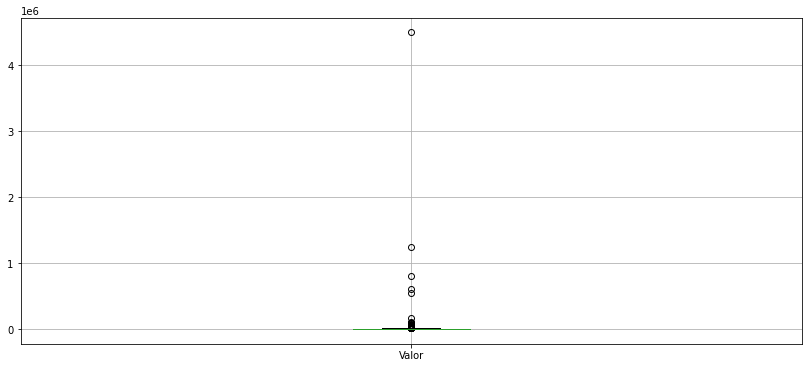

In [4]:
dados.boxplot(['Valor'])

In [6]:
dados[dados['Valor'] >= 100000]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
7629,Apartamento,Barra da Tijuca,1,1,0,65,600000.0,980.0,120.0,9230.77,Apartamento
10636,Casa de Condomínio,Freguesia (Jacarepaguá),4,2,3,163,800000.0,900.0,0.0,4907.98,Apartamento
12661,Apartamento,Freguesia (Jacarepaguá),2,2,1,150,550000.0,850.0,150.0,3666.67,Apartamento
13846,Apartamento,Recreio dos Bandeirantes,3,2,1,167,1250000.0,1186.0,320.0,7485.03,Apartamento
15520,Apartamento,Botafogo,4,1,1,300,4500000.0,1100.0,0.0,15000.00,Apartamento
19838,Apartamento,Leblon,3,1,2,450,100000.0,2400.0,0.0,222.22,Apartamento
21408,Apartamento,Barra da Tijuca,4,3,4,403,160000.0,3714.0,2000.0,397.02,Apartamento


In [7]:
valor = dados['Valor']

In [10]:
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [11]:
selecao = (valor >= limite_inferior) & (valor <= limite_superior)
dados_new = dados[selecao]

<AxesSubplot:>

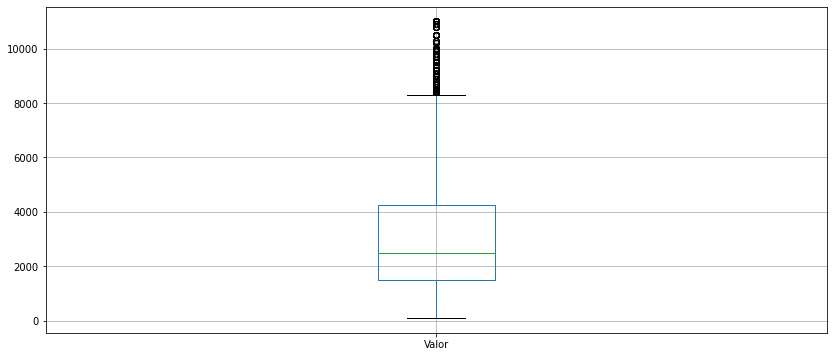

In [12]:
dados_new.boxplot(['Valor'])

array([[<AxesSubplot:title={'center':'Valor'}>]], dtype=object)

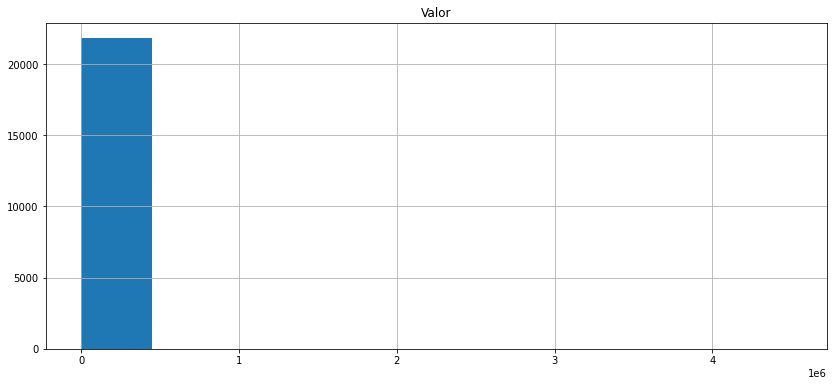

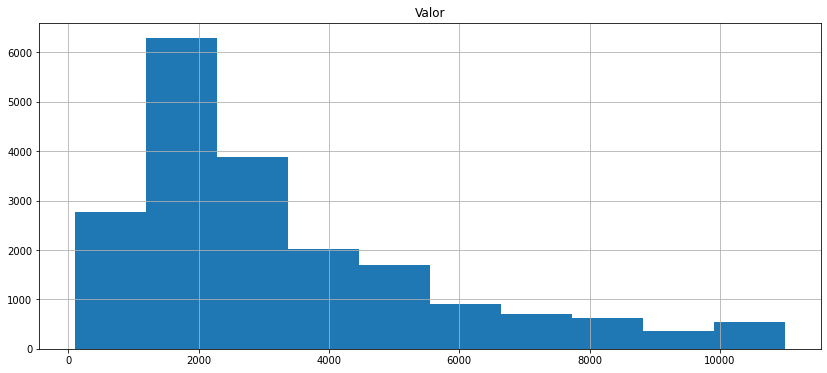

In [13]:
dados.hist(['Valor'])
dados_new.hist(['Valor'])

## Exercícios

In [17]:
dados_aluguel_amostra = pd.read_csv('dados/aluguel_amostra.csv', sep=';')
dados_aluguel_amostra.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Apartamento,Recreio dos Bandeirantes,3,2,1,320,3200.0,1319.0,0.0,10.00,Apartamento
1,Apartamento,Maracanã,2,0,0,59,800.0,725.0,47.0,13.56,Apartamento
2,Apartamento,Leblon,3,2,1,147,7500.0,1000.0,381.0,51.02,Apartamento
3,Apartamento,São Conrado,3,3,3,270,14999.0,2800.0,1200.0,55.55,Apartamento
4,Apartamento,Tijuca,2,1,0,65,1200.0,640.0,97.0,18.46,Apartamento
5,Apartamento,Cachambi,2,1,1,75,1400.0,715.0,0.0,18.67,Apartamento
6,Apartamento,Glória,1,0,0,52,1700.0,560.0,0.0,32.69,Apartamento
7,Apartamento,Engenho Novo,2,1,0,70,1200.0,430.0,21.0,17.14,Apartamento
8,Apartamento,Maracanã,1,1,0,59,1500.0,410.0,0.0,25.42,Apartamento
9,Apartamento,Flamengo,3,0,0,100,2500.0,980.0,105.0,25.00,Apartamento


<AxesSubplot:>

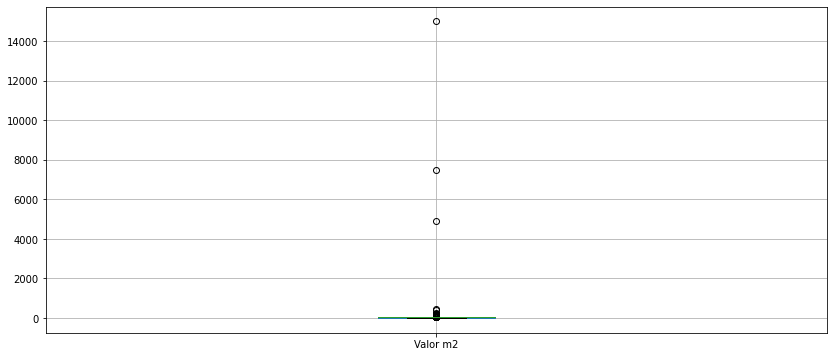

In [18]:
dados_aluguel_amostra.boxplot(['Valor m2'])

In [19]:
valor_amostra = dados_aluguel_amostra['Valor m2']
Q1_amostra = valor_amostra.quantile(.25)
Q3_amostra = valor_amostra.quantile(.75)
IIQ_amostra = Q3_amostra - Q1_amostra
limite_inferior_amostra = Q1_amostra - 1.5 * IIQ_amostra
limite_superior_amostra = Q3_amostra + 1.5 * IIQ_amostra

<AxesSubplot:>

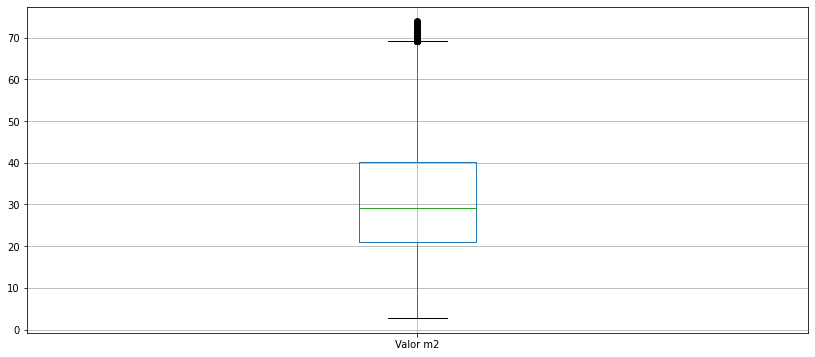

In [26]:
dados_plot_amostra = dados_aluguel_amostra[(dados_aluguel_amostra['Valor m2'] >= limite_inferior_amostra)
                                           & (dados_aluguel_amostra['Valor m2'] <= limite_superior_amostra)]
dados_plot_amostra.boxplot(['Valor m2'])

In [30]:
print('Q1 {}'.format(Q1_amostra))
print('Q3 {}'.format(Q3_amostra))
print('IIQ {}'.format(IIQ_amostra.round(2)))
print('Limite Inferior {}'.format(limite_inferior_amostra.round(2)))
print('Limite Superior {}'.format(limite_superior_amostra.round(2)))

Q1 21.25
Q3 42.31
IIQ 21.06
Limite Inferior -10.34
Limite Superior 73.9


array([[<AxesSubplot:title={'center':'Valor'}>]], dtype=object)

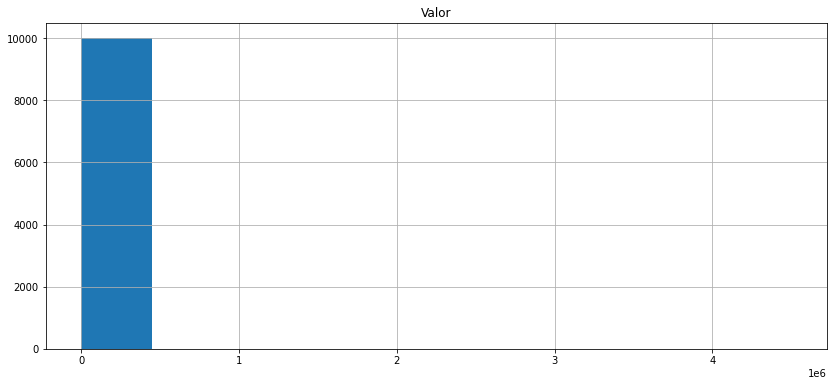

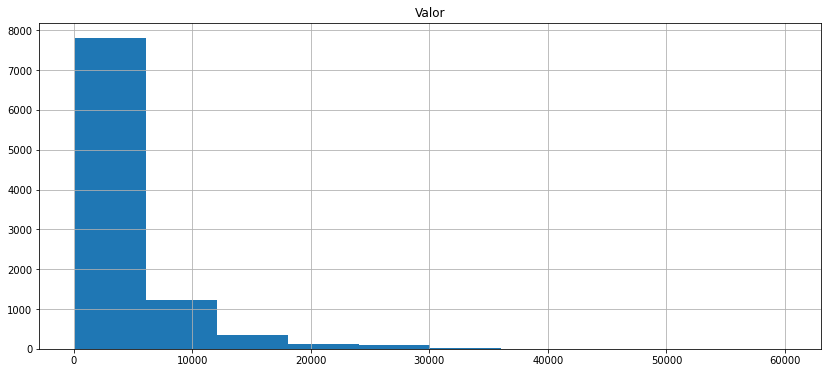

In [31]:
dados_aluguel_amostra.hist(['Valor'])
dados_plot_amostra.hist(['Valor'])

## Análise por grupos

<AxesSubplot:title={'center':'Valor'}, xlabel='[Tipo]'>

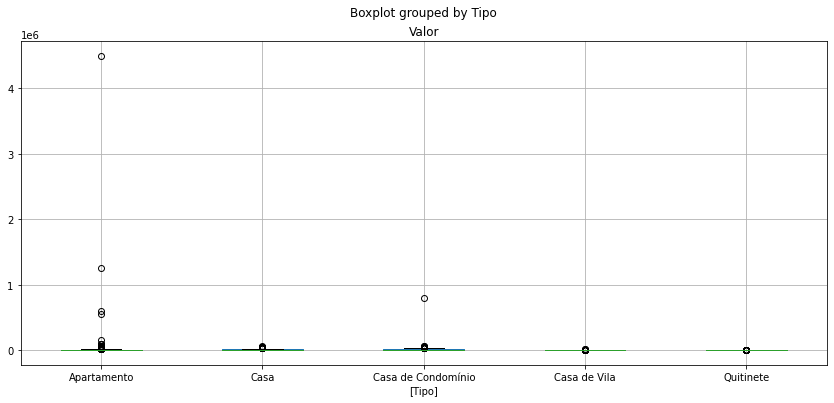

In [32]:
dados.boxplot(['Valor'], by=['Tipo'])

In [35]:
grupo_tipo = dados.groupby('Tipo')['Valor']

In [36]:
type(grupo_tipo)

pandas.core.groupby.generic.SeriesGroupBy

In [37]:
grupo_tipo.groups

{'Apartamento': [2, 3, 4, 7, 8, 9, 11, 13, 14, 15, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 55, 56, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 72, 73, 74, 75, 76, 77, 79, 80, 82, 83, 84, 85, 87, 88, 89, 90, 91, 92, 93, 94, 95, 97, 98, 99, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, ...], 'Casa': [1, 22, 54, 57, 96, 100, 144, 160, 180, 238, 250, 253, 264, 286, 310, 316, 334, 339, 357, 378, 385, 399, 424, 434, 474, 475, 481, 511, 542, 543, 567, 571, 572, 618, 621, 630, 635, 636, 660, 676, 700, 721, 724, 760, 771, 780, 856, 873, 937, 982, 1029, 1036, 1118, 1123, 1125, 1157, 1178, 1249, 1256, 1316, 1335, 1350, 1371, 1412, 1426, 1430, 1440, 1445, 1472, 1475, 1488, 1586, 1604, 1656, 1662, 1666, 1671, 1684, 1709, 1717, 1762, 1810, 1835, 1875, 1905, 1933, 1942, 1960, 2019, 2039, 2056, 2075, 2101, 2107, 2108, 2133, 2170, 2201, 2204, 2211, ...], 'Casa 

In [38]:
Q1 = grupo_tipo.quantile(.25)
Q3 = grupo_tipo.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [39]:
Q1

Tipo
Apartamento           1700.0
Casa                  1100.0
Casa de Condomínio    4000.0
Casa de Vila           750.0
Quitinete              900.0
Name: Valor, dtype: float64

In [40]:
Q3

Tipo
Apartamento            5000.0
Casa                   9800.0
Casa de Condomínio    15250.0
Casa de Vila           1800.0
Quitinete              1500.0
Name: Valor, dtype: float64

In [41]:
IIQ

Tipo
Apartamento            3300.0
Casa                   8700.0
Casa de Condomínio    11250.0
Casa de Vila           1050.0
Quitinete               600.0
Name: Valor, dtype: float64

In [42]:
limite_inferior

Tipo
Apartamento           -3250.0
Casa                 -11950.0
Casa de Condomínio   -12875.0
Casa de Vila           -825.0
Quitinete                 0.0
Name: Valor, dtype: float64

In [43]:
limite_superior

Tipo
Apartamento            9950.0
Casa                  22850.0
Casa de Condomínio    32125.0
Casa de Vila           3375.0
Quitinete              2400.0
Name: Valor, dtype: float64

In [44]:
limite_superior['Apartamento']

9950.0

In [45]:
limite_superior['Casa']

22850.0

In [49]:
dados_new = pd.DataFrame()
for tipo in grupo_tipo.groups.keys():
    eh_tipo = dados['Tipo'] == tipo
    eh_dentro_limite = (dados.Valor >= limite_inferior[tipo]) & (dados.Valor <= limite_superior[tipo])
    selecao = eh_tipo & eh_dentro_limite
    dados_selecao = dados[selecao]
    dados_new = pd.concat([dados_new, dados_selecao])

<AxesSubplot:title={'center':'Valor'}, xlabel='[Tipo]'>

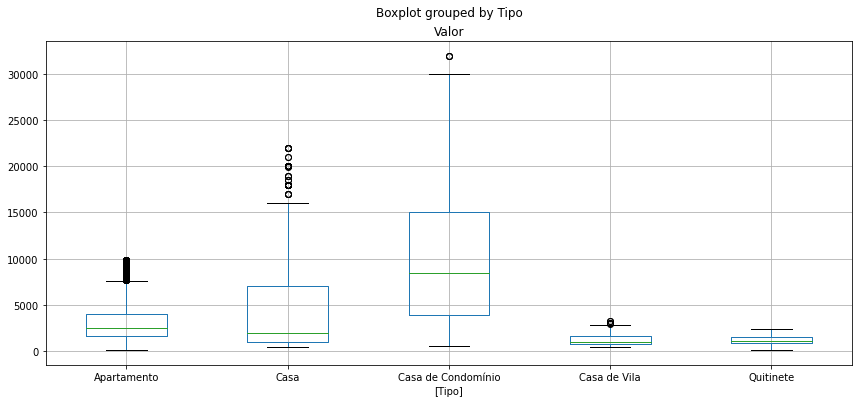

In [50]:
dados_new.boxplot(['Valor'], by=['Tipo'])

In [52]:
dados_new.to_csv('dados/aluguel_residencial_sem_outliers.csv', sep=';', index=False)